In [60]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import minmax_scale
#from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing import QuantileTransformer
#from c.preprocessing import PowerTransformer
# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble     import RandomForestRegressor ,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split

from math import sqrt  # for root mean-squared error calculation

import seaborn as sns  # pretty plotting, including heat map


import os
from IPython.display import display

from sklearn import preprocessing


Check current dirctory

In [61]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True# initial work with the smaller data set


boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\ndataset dimensions', boston_input.shape)

# look at the list of column names, note that y is the response
list(boston_input.columns.values)




boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

['neighborhood',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rooms',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'mv']

# Basic descriptive statistics

In [62]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
#print('\nGeneral description of the boston DataFrame:')
#print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
display(boston.describe())


Descriptive statistics of the boston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [63]:

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)


# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Data dimensions: (506, 13)
StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)


In [64]:
target = model_data[:,0]
#print(target)
print(model_data[0,0])
print(model_data[0,1])
#print(model_data[1,0])
data  = np.delete(model_data, 0, axis=1)
print(data[0,0])
print(data)


0.1603761596413756
-0.4197819386460083
-0.4197819386460083
[[-0.41978194  0.28482986 -1.2879095  ... -0.66660821 -1.45900038
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.98732948 -0.30309415
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.98732948 -0.30309415
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ... -0.80321172  1.17646583
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ... -0.80321172  1.17646583
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ... -0.80321172  1.17646583
  -0.66905833]]


Examine the structure of the DataFrame object

# Transformation

In [65]:
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
          'ElasticNet_Regression',
         'RandomForest_Regression', 
         'ExtraTrees_Regression',
         'GradientBoosting_Regressor']

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
              Ridge(alpha = 1, solver = 'cholesky', 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                         max_iter=10000, tol=0.01, 
                         fit_intercept = SET_FIT_INTERCEPT, 
                         normalize = False, 
                         random_state = RANDOM_SEED),
             RandomForestRegressor(n_estimators = 100, 
                                   criterion='mse', 
                                   max_features = 10, 
                                   bootstrap=True, 
                                   n_jobs = -1, 
                                   random_state = RANDOM_SEED),
              ExtraTreesRegressor(n_estimators = 100, 
                                  criterion='mse', 
                                  max_features = 10, 
                                  bootstrap=True, 
                                  n_jobs = -1, 
                                  random_state = RANDOM_SEED),
              GradientBoostingRegressor(n_estimators = 100, 
                                  criterion='mse', 
                                  max_depth=2, warm_start=True)
                                   
            ]




In [66]:
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation, restdata with its 
# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        #print('Fitted regression intercept:', reg_model.intercept_)
        #print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Coefficient of determination (R-squared): 0.7650752349379009
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.3080338355432656

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
Coefficient of determination (R-squared): 0.7670378077121726
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.30674447231421326

Reg

Coefficient of determination (R-squared): 0.8011862676556383
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.25190084876830027

Regression model evaluation for: GradientBoosting_Regressor
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
        

Coefficient of determination (R-squared): 0.7778889503446
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.5073344661057392

Regression model evaluation for: ExtraTrees_Regression
  Scikit Learn method: ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=1, verbose=0, warm_start=False)
Coefficient of determination (R-squared): 0.7357001809053213
{'bootstrap': True, 'criterion': 'mse', 'max_de

Coefficient of determination (R-squared): 0.7038660938745358
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.5146161900636195

Regression model evaluation for: ExtraTrees_Regression
  Scikit Learn method: ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=1, verbose=0, warm_start=False)
Coefficient of determination (R-squared): 0.8332977984255637
{'bootstrap': True, 'criterion': 'mse', 'max

Coefficient of determination (R-squared): 0.42933848617831927
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 1.005592243855571

Regression model evaluation for: ExtraTrees_Regression
  Scikit Learn method: ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=1, verbose=0, warm_start=False)
Coefficient of determination (R-squared): 0.44274699437495635
{'bootstrap': True, 'criterion': 'mse', 'ma

Coefficient of determination (R-squared): 0.30208759976243904
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.3851867447485946

Regression model evaluation for: ExtraTrees_Regression
  Scikit Learn method: ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=1, verbose=0, warm_start=False)
Coefficient of determination (R-squared): 0.47151168549888145
{'bootstrap': True, 'criterion': 'mse', 'm

In [67]:

# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor 
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV


# Import supplementary visualizations code visuals.py
import visuals as vs

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = train_test_split(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":range(1,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [25]:
prices = model_data[:,0]
features  = np.delete(model_data, 0, axis=1)
X = features
y = prices
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=50)

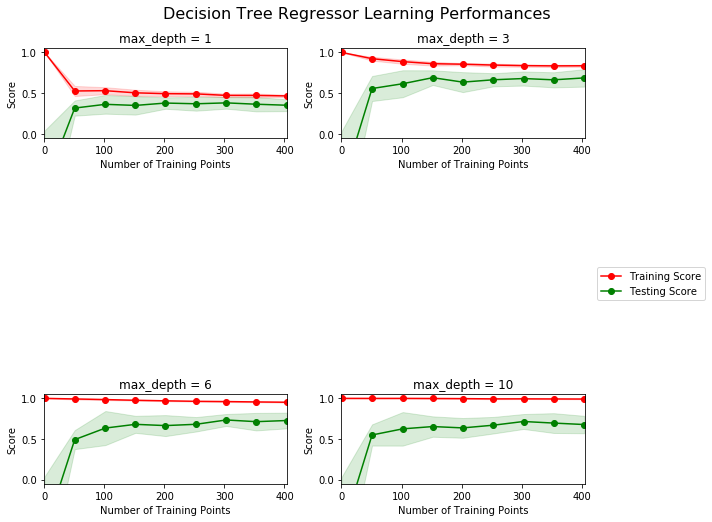

In [68]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(data, target)

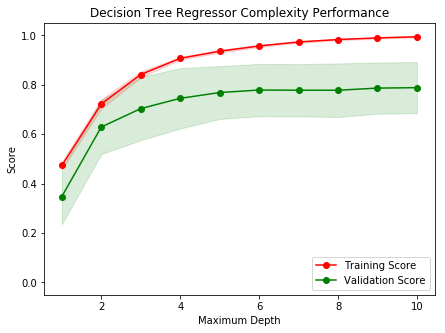

In [69]:
vs.ModelComplexity(X_train, y_train)

In [70]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [71]:
regressor = DecisionTreeRegressor()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

scoring_fnc = make_scorer(performance_metric)




# Create a base model
rf = RandomForestRegressor()

# Create the parameter grid based on the results of random search 

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, X_train)

grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.0min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [72]:
regressor = DecisionTreeRegressor()
params = {"max_depth":range(1,10)}

scoring_fnc = make_scorer(performance_metric)
grid_search = GridSearchCV(estimator = regressor, param_grid = params, 
                        cv = 4, n_jobs = -1, verbose = 2, scoring=scoring_fnc)
grid_search.fit(X_train, X_train)
grid_search.best_params_

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.1s finished


{'max_depth': 8}

In [73]:
from sklearn.tree import export_graphviz


regressor = DecisionTreeRegressor(max_depth=4)

prices = boston['mv']
features = boston.drop('mv', axis = 1)
#prelim_model_data
regressor.fit(features, prices)

export_graphviz(
        regressor, 
        out_file="boston.dot",
        feature_names=features.columns.values,
        class_names="mv",
        rounded=True,
        filled=True
    )



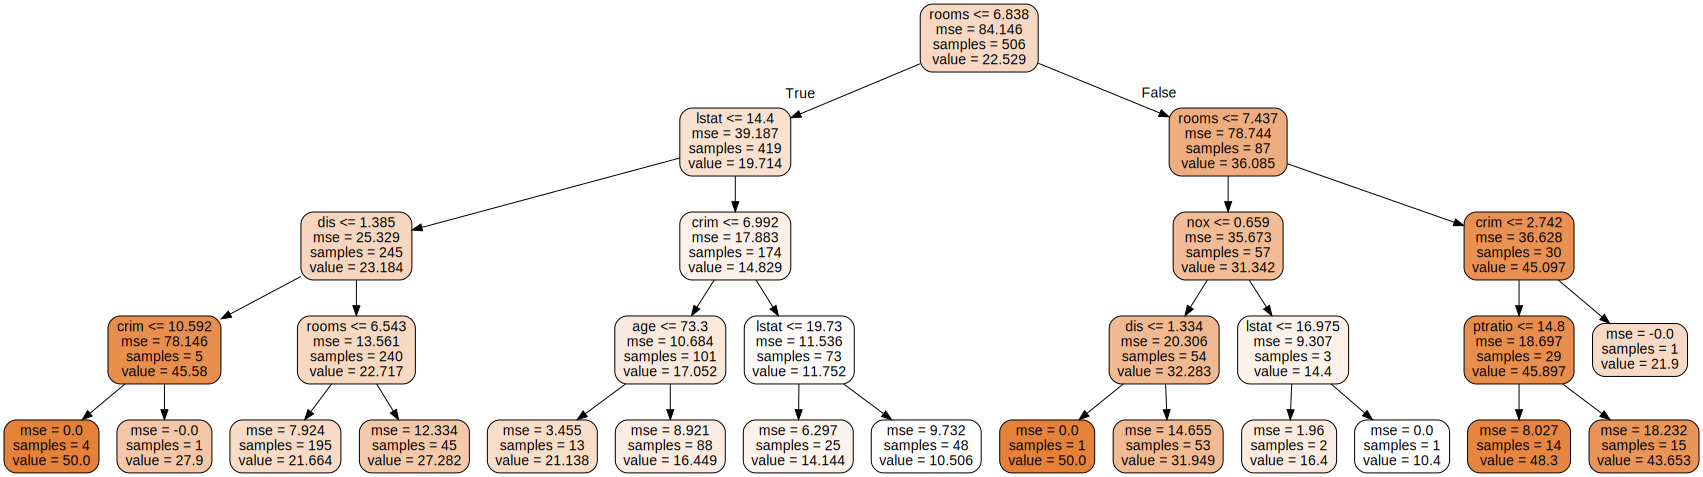

In [74]:
import graphviz

with open("boston.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)


gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [77]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [59]:
print("R^2=",gbrt.score(X_test,y_test)) # quick R^2
pred= gbrt.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('RMSE=', rmse)

R^2= 0.38338829102524075
RMSE= 0.3620568426928081


(-1, 12)

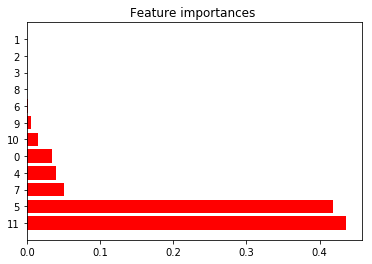

In [78]:
importances=gbrt.feature_importances_
std = np.std([gbrt.feature_importances_ for tree in gbrt.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances ")
plt.barh(range(X_test.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
plt.yticks(range(X_test.shape[1]), indices)
plt.ylim([-1, X_test.shape[1]])



NameError: name 'mydata5' is not defined

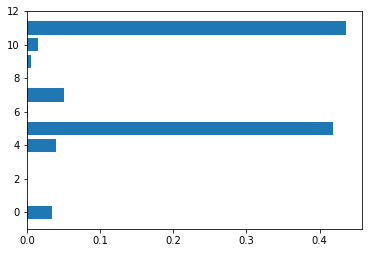

In [79]:
def plot_feature_importances_boston(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), mydata5.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importances_boston(gbrt)

In [80]:
boston.columns.values

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat', 'mv'], dtype=object)